# U.S. Medical Insurance Costs

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import random

df = pd.read_csv('insurance.csv')
df.index = range(1,1339)
print(df)

      age     sex     bmi  children smoker     region      charges
1      19  female  27.900         0    yes  southwest  16884.92400
2      18    male  33.770         1     no  southeast   1725.55230
3      28    male  33.000         3     no  southeast   4449.46200
4      33    male  22.705         0     no  northwest  21984.47061
5      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1334   50    male  30.970         3     no  northwest  10600.54830
1335   18  female  31.920         0     no  northeast   2205.98080
1336   18  female  36.850         0     no  southeast   1629.83350
1337   21  female  25.800         0     no  southwest   2007.94500
1338   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]


In [48]:
def main_values(column): #function defines base values(min,max,average) for column
    
    min = df[column].min()
    max = df[column].max()
    mean = round(df[column].mean(),3)
    return '{}: minimum value is {}, maximum value is {}, average value is {}'.format(column,min,max,mean)

[main_values('age'), main_values('bmi'), main_values('charges'), main_values('children')]

['age: minimum value is 18, maximum value is 64, average value is 39.207',
 'bmi: minimum value is 15.96, maximum value is 53.13, average value is 30.663',
 'charges: minimum value is 1121.8739, maximum value is 63770.42801, average value is 13270.422',
 'children: minimum value is 0, maximum value is 5, average value is 1.095']

<BarContainer object of 5 artists>

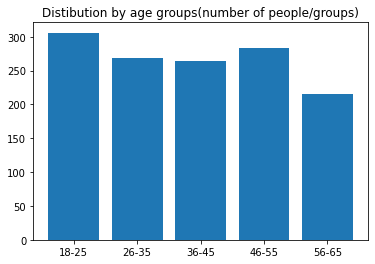

In [50]:

def age_groups(df): #function that makes ages categories
    groups = [0,0,0,0,0]
    for age in df['age']:
        if age <=25:
            groups[0]+=1
        elif age<=35:
            groups[1]+=1
        elif age<=45:
            groups[2]+=1
        elif age<=55:
            groups[3]+=1
        else:
            groups[4]+=1
    return [group for group in groups]
groups = ['18-25','26-35','36-45','46-55','56-65']
plt.title('Distibution by age groups(number of people/groups)')
plt.bar(groups,age_groups(df))

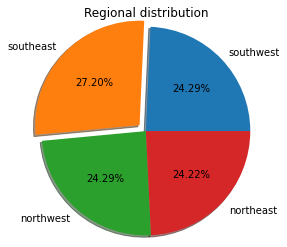

In [51]:
def region_distr(df):
    regions=[0,0,0,0]
    for region in df['region']:
        if region == 'southwest':
            regions[0]+=1
        if region == 'southeast':
            regions[1]+=1
        if region == 'northwest':
            regions[2]+=1
        if region == 'northeast':
            regions[3]+=1
    return [round(regions[i]*100/sum(regions),2) for i in range(len(regions))]
region_names = ["southwest","southeast","northwest","northeast"]
plt.title('Regional distribution')
plt.pie(region_distr(df), autopct='%.2f%%', radius = 1.2,
    explode = (0,0.1,0,0),shadow=True,labels=region_names)
plt.show()

In [52]:
# The next step of the analysis is to check the balance of males and females in our data.
def sex_distr(df):
    male=0
    female=0
    for sex in df['sex']:
        if sex=='male':
            male+=1
        else:
            female+=1 
    return 'This dataset is made up of about {}% females and {}% males'.format(round(female*100/(female+male),2),round(male*100/(female+male),2))
sex_distr(df)

'This dataset is made up of about 49.48% females and 50.52% males'

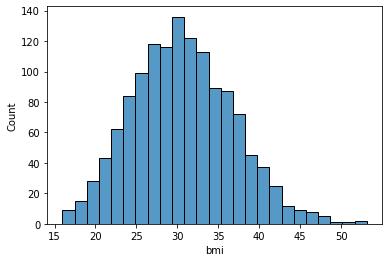

In [53]:
bmi = df["bmi"]
sns.histplot(bmi)
plt.show()

In [54]:
main_values('bmi')

'bmi: minimum value is 15.96, maximum value is 53.13, average value is 30.663'

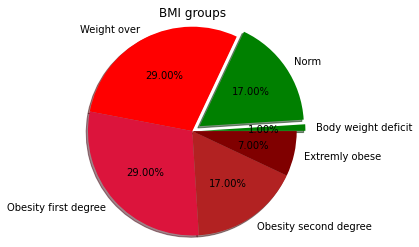

In [55]:

def bmi_groups(df):
    bmis = [0,0,0,0,0,0]
    for bmi in df['bmi']:
        if bmi<18.5:
            bmis[0]+=1
        elif bmi<25:
            bmis[1]+=1
        elif bmi<30:
            bmis[2]+=1
        elif bmi<35:
            bmis[3]+=1
        elif bmi<40:
            bmis[4]+=1
        elif bmi>=40:
            bmis[5]+=1
    return [round(bmi*100/sum(bmis)) for bmi in bmis]
bmi_group_names = ['Body weight deficit','Norm','Weight over','Obesity first degree','Obesity second degree','Extremly obese']
plt.title('BMI groups')
plt.pie(bmi_groups(df), autopct='%.2f%%', radius = 1.2,
    explode = (0.1,0.1,0,0,0,0),shadow=True,labels=bmi_group_names, colors = ['green','green','red','crimson','firebrick','maroon'])
plt.show()

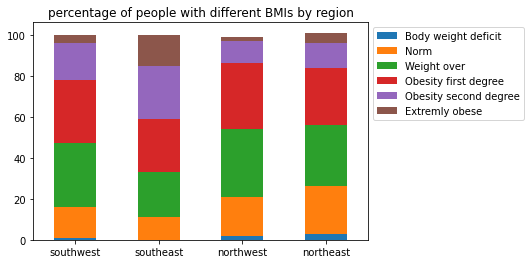

In [56]:
df_sw=df[df.region=='southwest'] #pick out dataframe of each region
df_se=df[df.region=='southeast']
df_nw=df[df.region=='northwest']
df_ne=df[df.region=='northeast']
data_bmi_groups = [bmi_groups(df_sw), bmi_groups(df_se), bmi_groups(df_nw), bmi_groups(df_ne)] 
df_bmi_groups = pd.DataFrame(data_bmi_groups)
df_bmi_groups.index = region_names
df_bmi_groups.columns = bmi_group_names
    
fig, ax = plt.subplots(1,1,figsize=(6,4))
df_bmi_groups.plot(kind='bar', stacked=True, ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
plt.legend(bbox_to_anchor=(1, 1))
plt.title('percentage of people with different BMIs by region')
plt.show()

### Let's look at BMI dependence on gender.

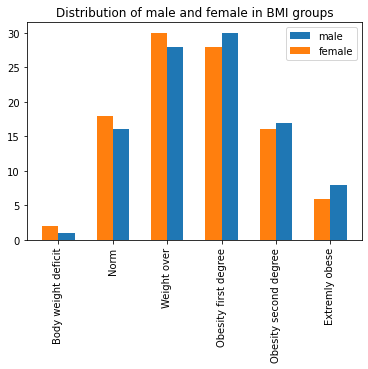

In [57]:
x = np.arange(len(bmi_group_names))
x1 = [i+0.15 for i in x]
x2 = [i-0.15 for i in x]
df_male = df[df.sex=='male']
df_female = df[df.sex=='female']
y1 = bmi_groups(df_male)
y2 = bmi_groups(df_female)
width = 0.3
fig, ax = plt.subplots()
ax.bar(x1, y1, width, label='male')
ax.bar(x2, y2, width, label='female')
ax.set_title('Distribution of male and female in BMI groups')
ax.set_xticks(x)
ax.set_xticklabels(bmi_group_names, rotation = 90)
ax.legend()

MEN ARE MORE PRONE TO OBESITY

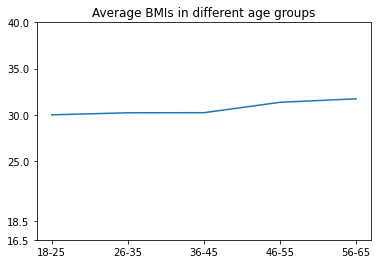

In [58]:
df_age_1 = df[df.age<=25]
df_age_2 = df[(df.age<=35)&(df.age>25)]
df_age_3 = df[(df.age<=45)&(df.age>35)]
df_age_4 = df[(df.age<=55)&(df.age>45)]
df_age_5 = df[(df.age<=65)&(df.age>55)]
average_bmi_in_group_of_age = [df_age_1['bmi'].mean(),df_age_2['bmi'].mean(),df_age_3['bmi'].mean(),df_age_4['bmi'].mean(),df_age_5['bmi'].mean()]
fig,ax = plt.subplots()
ax.plot(groups,average_bmi_in_group_of_age)
ax.set_yticks([16.5,18.5,25,30,35,40])
plt.title('Average BMIs in different age groups')
plt.show()
x = df["age"]
y = df["bmi"]

In [59]:

df_smoke_no = df[df.smoker == 'no']
df_smoke_yes = df[df.smoker == 'yes']
bmis_smoke = [round(df_smoke_no['bmi'].mean(),2),round(df_smoke_yes['bmi'].mean(),2)]
print("Average  BMI for nonsmokers and smokers"+str(bmis_smoke))

Average  BMI for nonsmokers and smokers[30.65, 30.71]


/home/kay/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


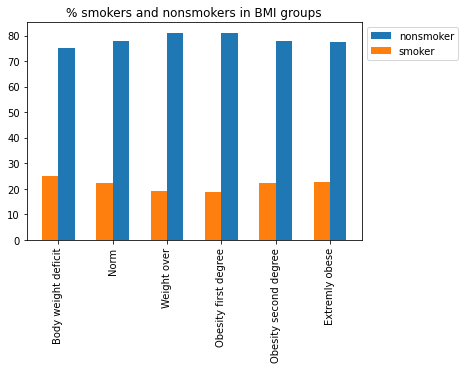

In [60]:
df_dw = df[df.bmi<18.5]
df_nw = df[(df.bmi<25) & (df.bmi>=18.5)]
df_ow = df[(df.bmi<30) & (df.bmi>=25)]
df_o1 = df[(df.bmi<35) & (df.bmi>=30)]
df_o2 = df[(df.bmi<40) & (df.bmi>=35)]
df_eo = df[(df.bmi<45) & (df.bmi>=40)]
def pr(group,arg):
    lst = list(group.groupby([arg])['bmi'].count())
    return [i*100/sum(lst) for i in lst]
x = np.arange(len(bmi_group_names))
x1 = [i+0.15 for i in x]
x2 = [i-0.15 for i in x]
for i in range(2):
    y[i] = [pr(df_dw,'smoker')[i],pr(df_nw,'smoker')[i],pr(df_ow,'smoker')[i],
            pr(df_o1,'smoker')[i],pr(df_o2,'smoker')[i],pr(df_eo,'smoker')[i]]
width = 0.3
fig, ax = plt.subplots()
ax.bar(x1, y[0], width, label='nonsmoker')
ax.bar(x2, y[1], width, label='smoker')
ax.set_title('% smokers and nonsmokers in BMI groups')
ax.set_xticks(x)
ax.set_xticklabels(bmi_group_names, rotation = 90)
ax.legend(bbox_to_anchor=(1, 1))

Slope coefficients of straight lines for smokers 1473.11 and nonsmokers 83.35


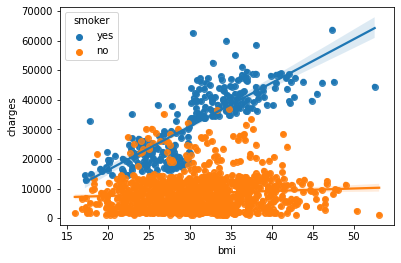

In [61]:
fig,ax = plt.subplots()
sns.scatterplot(x = df.bmi,y = df.charges, hue = df.smoker)
sns.regplot(x = df[df.smoker=='yes'].bmi,y = df[df.smoker=='yes'].charges)
sns.regplot(x = df[df.smoker=='no'].bmi,y = df[df.smoker=='no'].charges)
A1 = np.vstack([df[df.smoker=='yes'].bmi,np.ones(len(df[df.smoker=='yes'].bmi))]).T
m1,c1 = np.linalg.lstsq(A1,df[df.smoker=='yes'].charges,rcond=None)[0]
A0 = np.vstack([df[df.smoker=='no'].bmi,np.ones(len(df[df.smoker=='no'].bmi))]).T
m0,c0 = np.linalg.lstsq(A0,df[df.smoker=='no'].charges,rcond=None)[0]
print("Slope coefficients of straight lines for smokers {} and nonsmokers {}".format(round(m1,2),round(m0,2)))

plt.show()

In [62]:
len(df)

1338

In [63]:
df.sample(n=20)

,age,sex,bmi,children,smoker,region,charges
666,43,male,38.060,2,yes,southeast,42560.43040
429,21,female,16.815,1,no,northeast,3167.45585
1051,44,female,36.955,1,no,northwest,8023.13545
259,51,male,24.415,4,no,northwest,11520.09985
499,44,female,23.980,2,no,southeast,8211.10020
389,26,female,22.610,0,no,northwest,3176.81590
578,31,female,38.095,1,yes,northeast,58571.07448
1023,47,male,36.080,1,yes,southeast,42211.13820
689,47,female,24.100,1,no,southwest,26236.57997
284,55,female,32.395,1,no,northeast,11879.10405


In [64]:
df.isnull().any()

age         False
sex         False
bmi         False
children    False
smoker      False
region      False
charges     False
dtype: bool

In [65]:
df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [66]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


The dataset has an age range from 18 years to 64 years.
The highest number of children for patient is 5

In [67]:
df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [68]:
data['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [69]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [70]:
# Writing a function to give the number of unique values in a column
def unique_value_counts(data, column):
    return data[column].value_counts()
    

In [71]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [72]:
type(df.columns)

pandas.core.indexes.base.Index

In [73]:
columns = list(data.columns)

In [74]:
type(columns)

list

In [75]:
columns = ['sex', 'smoker', 'region']

In [76]:
for column in columns:
    print(unique_value_counts(data, column))

male      676
female    662
Name: sex, dtype: int64
no     1064
yes     274
Name: smoker, dtype: int64
southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


#### PLOTTING GRAPHS

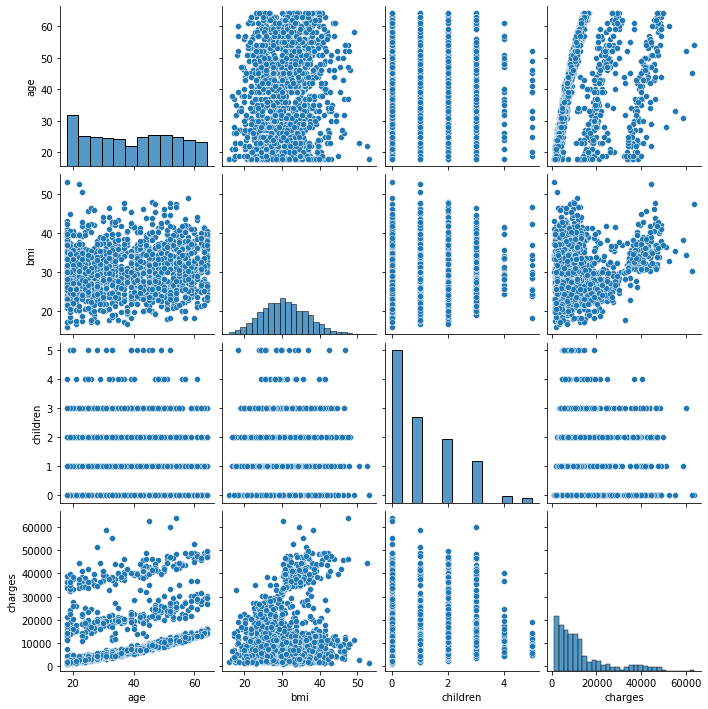

In [77]:
sns.pairplot(df)